### Zad
*bupa.csv* - Regresja. Należy przewidzieć wartość w ostatniej kolumnie (ilość wypijanego alkoholu). Może przeprowadzić eksperymenty z przewidywaniem niektórych pomiarów (kol 1-5).

`import bibliotek`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Załadowanie danych

In [2]:
df = pd.read_csv("bupa.csv")

In [3]:
df

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


1- MCV - Mean Corpuscular Volume. An MCV blood test measures the average size of red blood cells, also known as erythrocytes. 

2- ALKPHOS – Alkaline Phosphatase (ALP) is an enzyme found in several tissues throughout the body. The highest concentrations of ALP are present in the cells that comprise bone and the liver.

3- SGTP - Sérum glutamic pyruvic transaminase. An enzyme that is normally present in liver and heart cells. SGPT is released into the blood when the liver or heart is damaged.

4- SGOT - Sérum glutamic oxaloacetic transaminase. An enzyme that is normally present in liver and heart cells, SGOT is released into the blood when the liver or heart is damaged.

5- Gamma GT - glutamytransferase. An enzyme found in liver cells and the biliary tract, it is a very sensitive indicator of abnormality in the liver or bile duct system. 

6- DRINKS - number of half-pint equivalents of alcoholic beverages drunk per day.


`Podstawowe statystyki oparte na danych`

In [4]:
df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


`Inforamcja o typie danych`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mcv      345 non-null    int64  
 1   alkphos  345 non-null    int64  
 2   sgpt     345 non-null    int64  
 3   sgot     345 non-null    int64  
 4   gammagt  345 non-null    int64  
 5   drinks   345 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 16.3 KB


`Sprawdzenie czy są braki danych`

In [6]:
df.isna().sum()

mcv        0
alkphos    0
sgpt       0
sgot       0
gammagt    0
drinks     0
dtype: int64

`Histogram na podstawie zmiennej drinks`

D:\Anaconda3\envs\training\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


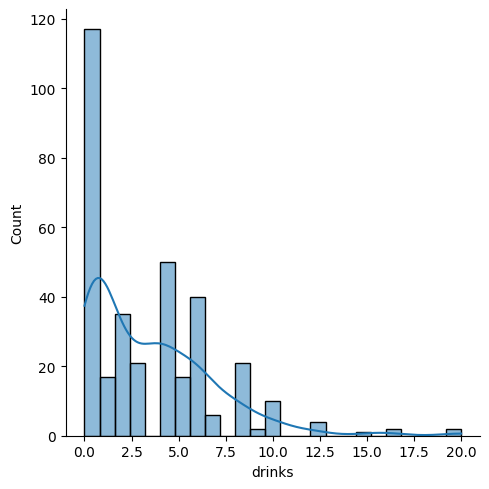

In [7]:
sns.displot(data=df["drinks"], bins=25, kde=True)

In [8]:
df["drinks"].value_counts(ascending=False)

drinks
0.5     108
4.0      50
6.0      40
2.0      35
3.0      21
8.0      21
1.0      17
5.0      17
10.0     10
0.0       9
7.0       6
12.0      4
9.0       2
16.0      2
20.0      2
15.0      1
Name: count, dtype: int64

`Wykresy punktowe zależnosci między zmiennymi`

D:\Anaconda3\envs\training\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


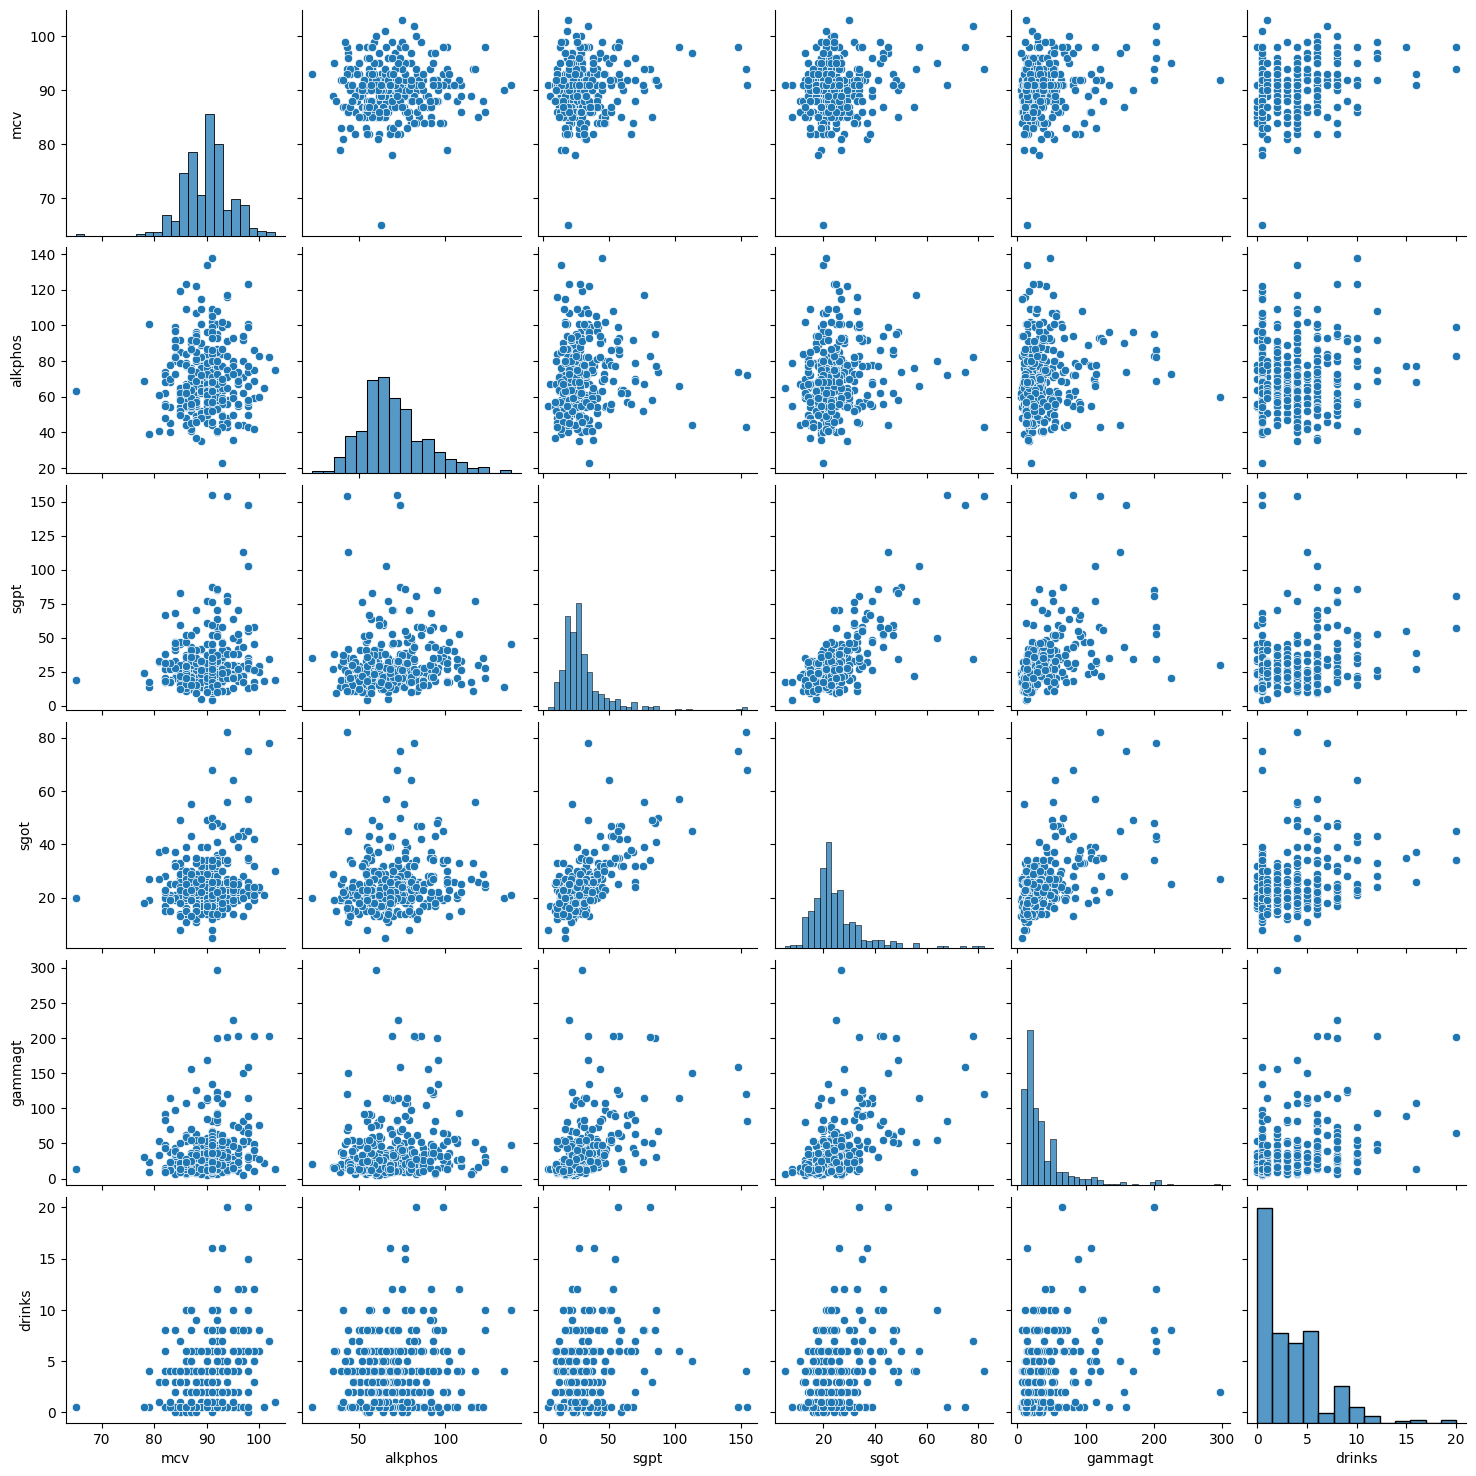

In [9]:
sns.pairplot(df)

`Wykres pudełkowy by zobaczyć czy istnieją jakieś wartości odstające`

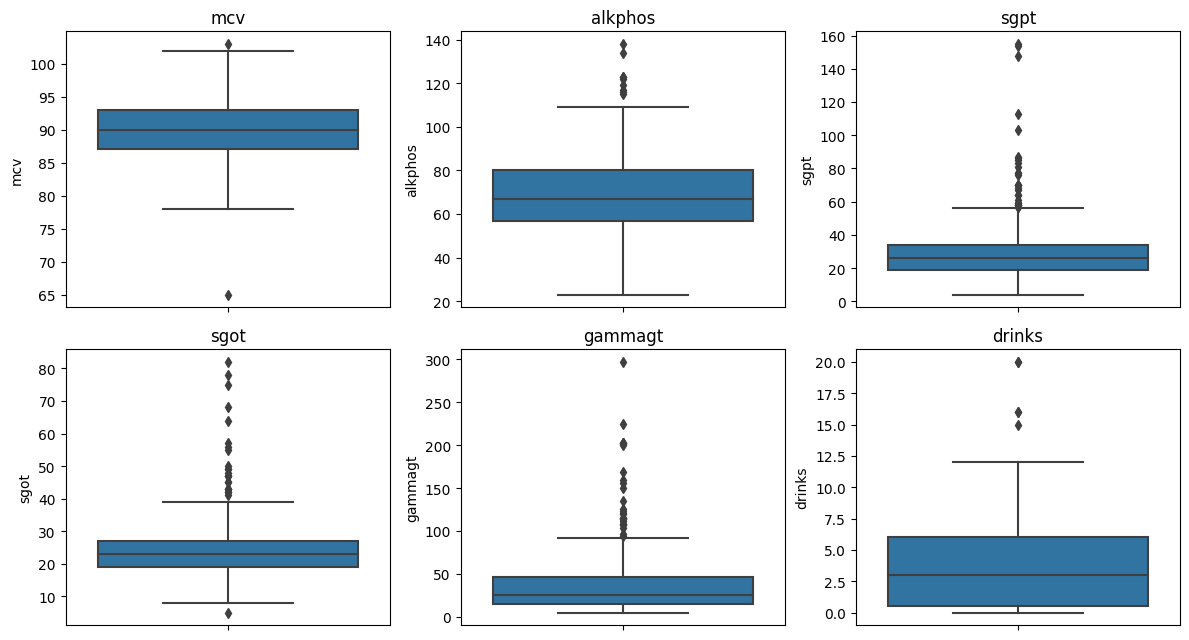

In [10]:
plt.figure(figsize=(12, 16))  

# Loop through each column and create a boxplot 
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(5, 3, df.columns.get_loc(column) + 1)
        sns.boxplot(y=df[column])
        plt.title(column)

plt.tight_layout()
plt.show()

Istnieje wiele wartości odstających w danych, jednak ciężko bężie pozbyć się wielu ponieważ w wiekszości dane nie mają rozkładu normalnego. Po pozbyciu się tak wielu danych odstających nie zostało by wiele danych do pracy.

Wykorzystaliśmy powszechną metodę usuwania wartości odstających w oparciu o kwartyle (Q1 i Q3).Zakres międzykwartylowy (IQR), który jest różnicą między Q3 i Q1. Zamiast stosować tradycyjną metodę uznawania wartości poniżej Q1 - 1,5 * IQR lub powyżej Q3 + 1,5 * IQR za wartości odstające, można wybrać inne mnożniki lub zastosować zupełnie inne podejście. Dostosowanie tych progów pozwala na bardziej lub mniej rygorystyczne identyfikowanie wartości odstających.

My dla maksymalnych wartości odstających zastosowaliśmy większy mnożnik o wartości 2.2, który zwiększa zakres dozwalanych wartości odstających.

In [11]:
for column in range(len(df.columns)):
    q75, q25 = np.percentile(df[df.columns[column]], [75, 25])
    iqr = q75 - q25
    iqrMin = q25 - (iqr * 1.5)
    iqrMax = q75 + (iqr * 2.2)
    print(df.columns[column])
    print(f"iqrMin {iqrMin}")
    print(f"iqrMax {iqrMax}")
    print(f"ilość IqrMin: {len(df[df[df.columns[column]] < iqrMin])}")
    print(f"ilość IqrMax: {len(df[df[df.columns[column]] > iqrMax])}")
    df = df.drop(df[df[df.columns[column]] < iqrMin].index, axis=0)
    df = df.drop(df[df[df.columns[column]] > iqrMax].index, axis=0)

mcv
iqrMin 78.0
iqrMax 106.2
count IqrMin: 1
count IqrMax: 0
alkphos
iqrMin 22.5
iqrMax 130.6
count IqrMin: 0
count IqrMax: 2
sgpt
iqrMin -1.0
iqrMax 64.80000000000001
count IqrMin: 0
count IqrMax: 18
sgot
iqrMin 8.5
iqrMax 41.400000000000006
count IqrMin: 3
count IqrMax: 13
gammagt
iqrMin -19.5
iqrMax 88.6
count IqrMin: 0
count IqrMax: 19
drinks
iqrMin -4.75
iqrMax 11.700000000000001
count IqrMin: 0
count IqrMax: 3


Po usunięciu wartości wykresy wyglądają następujuąco 

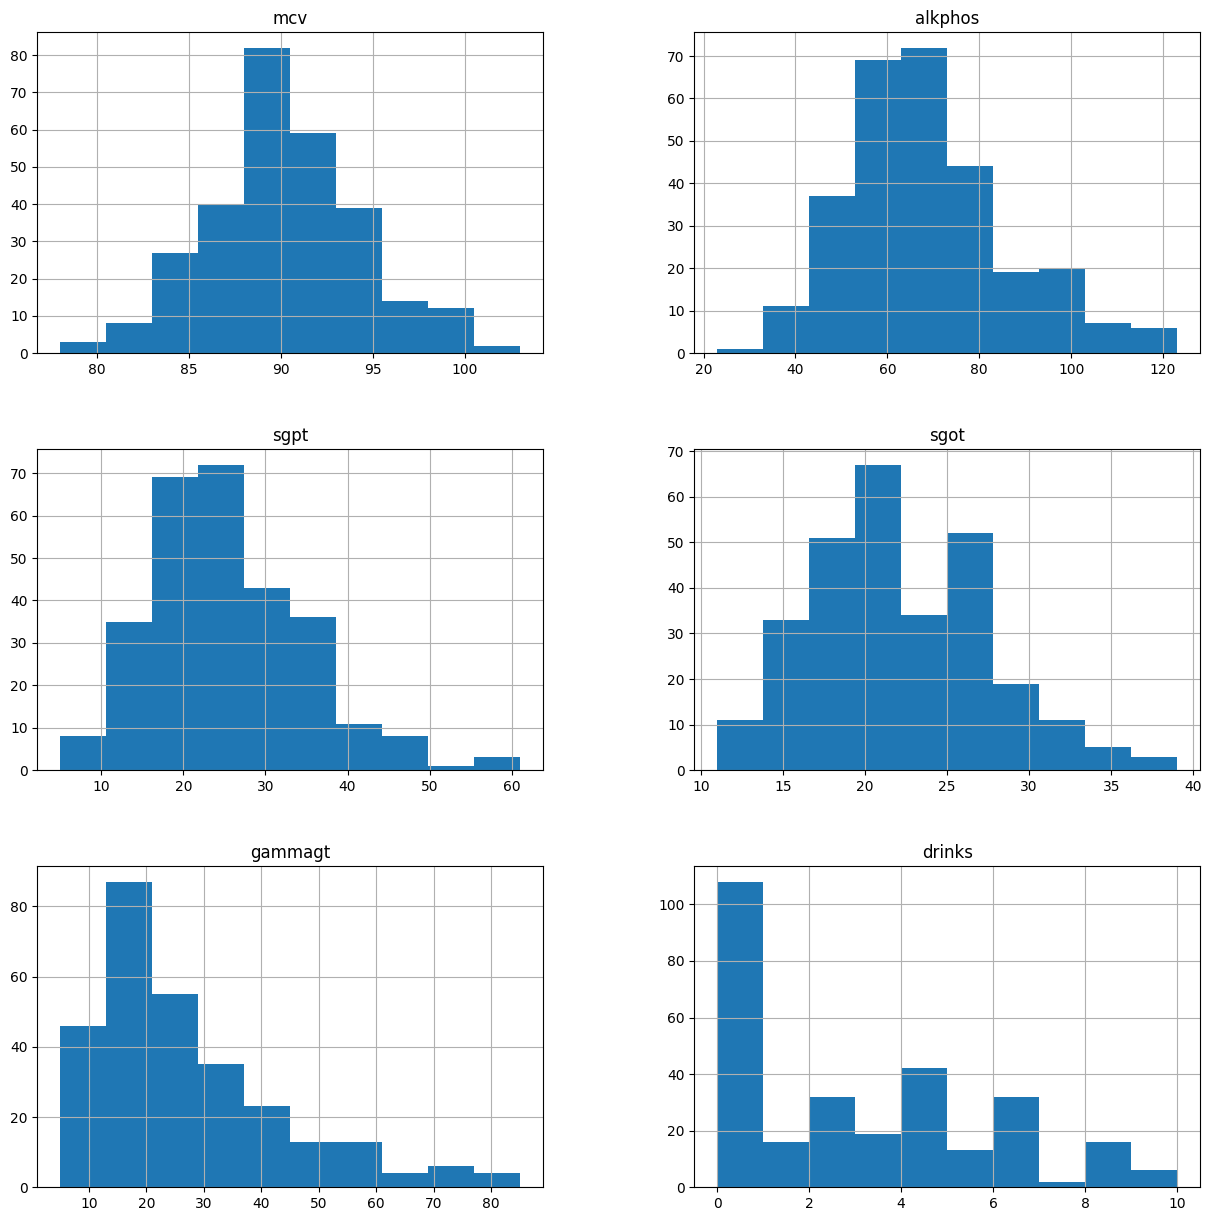

In [12]:
df.hist(figsize=(15,15))
plt.show()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 0 to 338
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mcv      286 non-null    int64  
 1   alkphos  286 non-null    int64  
 2   sgpt     286 non-null    int64  
 3   sgot     286 non-null    int64  
 4   gammagt  286 non-null    int64  
 5   drinks   286 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 15.6 KB


Odrzuciliśmy tym sposobem ponad 60 odstających wartości

D:\Anaconda3\envs\training\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


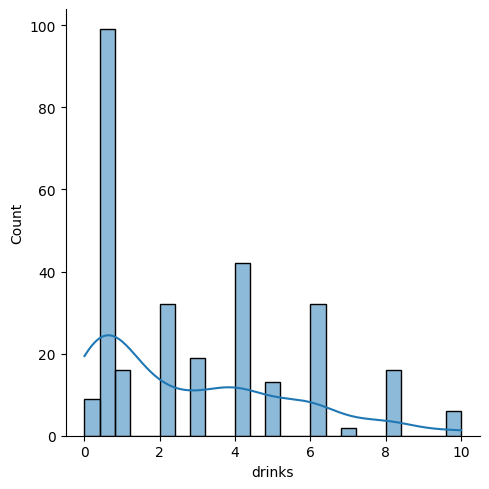

In [17]:
sns.displot(data=df["drinks"], bins=25, kde=True)

`Korelacja pomiędzy zmiennymi`

In [18]:
df.corr()

,mcv,alkphos,sgpt,sgot,gammagt,drinks
mcv,1.000000,-0.000374,-0.001040,0.007884,0.142584,0.230120
alkphos,-0.000374,1.000000,0.091175,0.155502,0.049581,-0.027909
sgpt,-0.001040,0.091175,1.000000,0.440218,0.362015,-0.021343
sgot,0.007884,0.155502,0.440218,1.000000,0.240486,0.081796
gammagt,0.142584,0.049581,0.362015,0.240486,1.000000,0.221154
drinks,0.230120,-0.027909,-0.021343,0.081796,0.221154,1.000000


<Axes: >

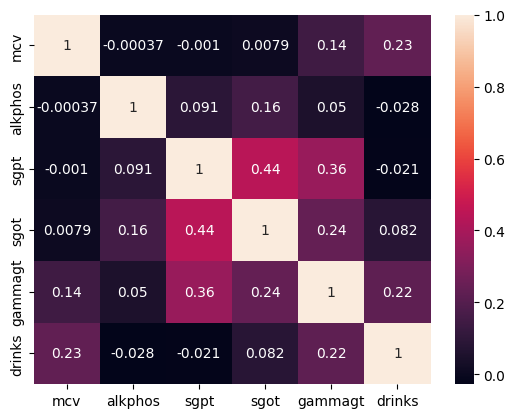

In [19]:
sns.heatmap(df.corr(), annot=True)

Zmienne między sobą są nie za dobrze skorelowane

------------------------------------------------------------------------------------------------------

## Tworzenie Modeli Regresji 

### 1. Uwtorzenie modelu regresji liniowej wykorzystując wszystkie zmienne

Dzielimy dane na X - objaśniające  oraz y - objaśnianą

In [20]:
X = df.drop("drinks", axis=1)
y = df["drinks"]

Definiujemy funkcje:
1. `TrainProcess` - Dzielimy w niej dane na uczące oraz testowe, następnie skalujemy dane, po czym wrzucamy je do modelu Regresji liniowej

2. `Metrics` - Wyznaczamy metryki typowe dla modelu regresji. *mean_absolute_error* - średni błąd bezwzględny, *mean_squared_error* -  błąd średniokwadratowy, *root_mean_squared_error* - Pierwiastek błędu średniokwadratowego

3. `KdePlot` - Utworzenie wykresu zależności między wartościami testowymi a wartością przewidywaną

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [22]:
def TrainProcess(X, y, testSize: float, randomState: int):
    # Podzielenie zbioru danych na zestaw treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=randomState)
    ## Standaryzacja cech przy użyciu StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test) 
    # Trenowanie modelu regresji liniowej 
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Przewidywanie na zbiorze testowym
    test_predictions = model.predict(X_test)
    # Zwraca przewidywania testu i rzeczywiste etykiety (y_test)
    return test_predictions, y_test, model

In [23]:
def Metrics(y_test, TestPredictions):
    print("mean_absolute_error:", mean_absolute_error(y_test, TestPredictions))
    print("mean_squared_error;", mean_squared_error(y_test, TestPredictions))
    print("root_mean_squared_error:", np.sqrt(mean_squared_error(y_test, TestPredictions)))

In [24]:
def KdePlot(TestPredictions, y_test):
    sns.kdeplot(data=TestPredictions,  color="red", label="test_predictions")
    sns.kdeplot(data=y_test, color="green", label="y_test")
    plt.legend();

In [25]:
test_predictionsModel1, y_testModel1, model = TrainProcess(X, y, 0.25, 36)

In [26]:
MetrykiModel1 = Metrics(y_testModel1, test_predictionsModel1)
MetrykiModel1

mean_absolute_error: 1.8718177020494986
mean_squared_error; 5.176838472386435
root_mean_squared_error: 2.275266681597222


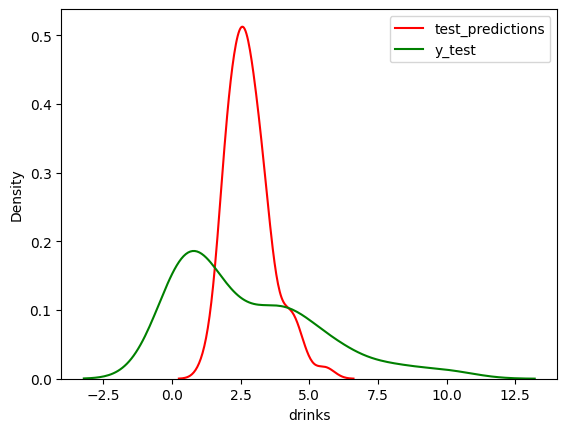

In [27]:
KdePlot(test_predictionsModel1, y_testModel1)

#### Wnioski z modelu 1
Wartości przewidywane znacząco odbiegają od wartości podanych w zbiorze, model zdecydowanie nie nadaje się do dalszych działań

### 2. Tworzenie modelu Aproksymacji wielomianowej (Polynomial regression) - dla wielomianu stopnia 2

metoda aproksymacji polegająca na przybliżeniu funkcji za pomocą wielomianu.

In [28]:
from sklearn.preprocessing import PolynomialFeatures

Zmiana funckji liniowej na funkcje wielomianowa stopnia 2

In [29]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [30]:
poly_features = poly.fit_transform(X)

In [31]:
print("ilość zmiennych dla fucnkcji liniowej: ", X.shape[1])
print("ilość zmiennych dla fucnkcji wielomianowej stopnia 2: ", poly_features.shape[1])

ilość zmiennych dla fucnkcji liniowej:  5
ilość zmiennych dla fucnkcji wielomianowej stopnia 2:  20


In [32]:
test_predictionsModel2, y_testModel2, model = TrainProcess(poly_features, y, 0.25, 36)

In [33]:
MetrykiModel2 = Metrics(y_testModel2, test_predictionsModel2)
MetrykiModel2

mean_absolute_error: 2.0136932877103346
mean_squared_error; 6.041259245772939
root_mean_squared_error: 2.4578973220565863


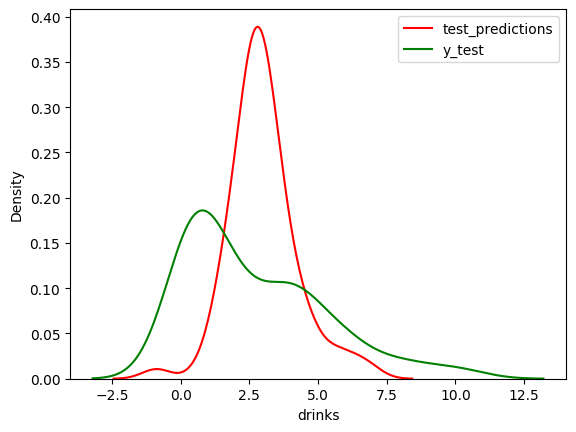

In [34]:
KdePlot(test_predictionsModel2, y_testModel2)

#### Wnioski z modelu 2
Wartości przewidywane znacząco odbiegają od wartości podanych w zbiorze, wartości z metryk są lekko gorsze niż dla zwykłej funkcji liniowej

### 3. Tworzenie modelu Aproksymacji wielomianowej dla wielu wartości wielomianu 


In [35]:
train_rmse_errors= []
test_rmse_errors = []

for i in range(1,5):
    poly_converter = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

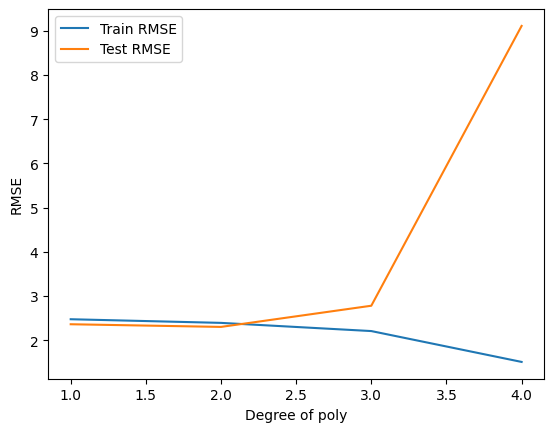

In [36]:
plt.plot(range(1,5), train_rmse_errors[:5], label="Train RMSE")
plt.plot(range(1,5), test_rmse_errors[:5], label="Test RMSE")
plt.xlabel("Degree of poly")
plt.ylabel("RMSE")
plt.legend()

#### Wnioski z modelu 3
Jak widać czym większy stopień wielomianu tym wyniki są jeszcze gorsze

### 4. Uwtorzenie modelu regresji liniowej wykorzystując 2 zmienne o największej korelacji


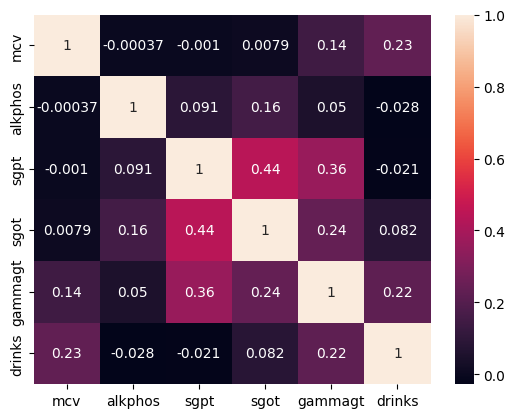

In [37]:
sns.heatmap(df.corr(), annot=True);

In [38]:
X = df.drop(["alkphos","sgpt","sgot", "drinks"], axis=1)
y = df["drinks"]

In [39]:
X

,mcv,gammagt
0,85,31
1,85,23
2,86,54
3,91,36
4,87,10
...,...,...
332,100,28
335,92,37
336,86,23
337,91,37


In [40]:
test_predictionsModel4, y_testModel4, model = TrainProcess(X, y, 0.25, 36)

In [41]:
MetrykiModel4 = Metrics(y_testModel4, test_predictionsModel4)
MetrykiModel4

mean_absolute_error: 1.9042956212470328
mean_squared_error; 5.311365612791582
root_mean_squared_error: 2.304640018048715


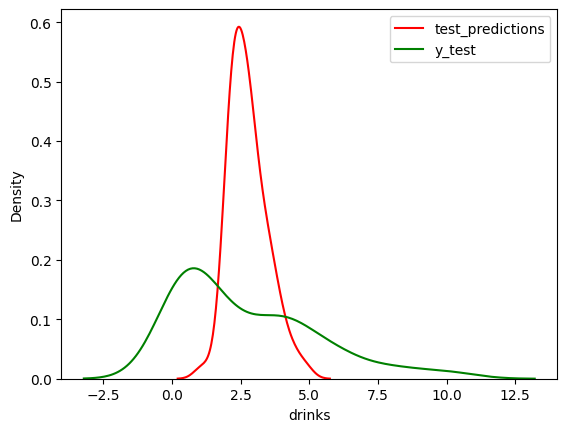

In [42]:
KdePlot(test_predictionsModel4, y_testModel4)

### 5. Uwtorzenie modelu regresji liniowej wykorzystując 3 zmienne o największej korelacji


In [43]:
X = df.drop(["alkphos","sgpt", "drinks"], axis=1)
y = df["drinks"]

In [44]:
test_predictionsModel5, y_testModel5, model = TrainProcess(X, y, 0.25, 36)

In [45]:
MetrykiModel5 = Metrics(y_testModel5, test_predictionsModel5)
MetrykiModel5

mean_absolute_error: 1.9305073967563189
mean_squared_error; 5.363882783338724
root_mean_squared_error: 2.316005782233439


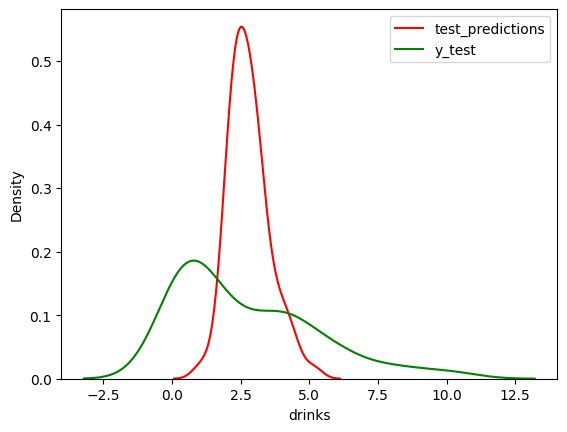

In [46]:
KdePlot(test_predictionsModel5, y_testModel5)

### Model Regularyzacji ElacticNet

ElasticNet to technika regularyzacji używana zwłaszcza w problemach regresji, mająca na celu kontrolowanie przeuczenia modelu poprzez dodanie kary za duże wartości wag cech. Jest to połączenie dwóch rodzajów regularyzacji: L1 (Lasso) i L2 (Ridge).

Parametr `l1_ratio`  kontroluje proporcję pomiędzy regularyzacją L1 a L2. Wartość l1_ratio równa 1 oznacza pełną regularyzację L1 (Lasso), 0 oznacza pełną regularyzację L2 (Ridge), a wartość pomiędzy 0 a 1 oznacza kombinację obu rodzajów regularyzacji.

Parametr `eps` to parametr kontroli, który zapobiega dzieleniu przez zero podczas optymalizacji. Jest to mała wartość dodawana do mianownika, aby uniknąć błędów numerycznych.

Parametr `n_alphas` określa liczbę wartości lambda (parametru regularyzacji) generowanych w trakcie optymalizacji. Te wartości lambda są używane do dopasowywania modelu z różnymi stopniami regularyzacji, co pozwala na znalezienie optymalnego poziomu regularyzacji dla danego zestawu danych.

In [47]:
X = df.drop("drinks", axis=1)
y = df["drinks"]

Funkcja dzięki której dzielimy dane oraz je skalujemy

In [48]:
def SplitData(X, y, testSize: float, randomState: int):
     # Podzielenie zbioru danych na zestaw treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=randomState)
    ## Standaryzacja cech przy użyciu StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test) 
    return X_train, X_test, y_train, y_test

In [49]:
X_train, X_test, y_train, y_test = SplitData(X, y, 0.25, 36)

In [50]:
from sklearn.linear_model import ElasticNetCV

Ustalenie parametów za pomocą które model będzie próbował użyć i znaleźć najlepsze by uzyskać najlepszy wynik

In [51]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .3, .5, .7, .8, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=10000)

In [52]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 1],
             max_iter=10000)

In [53]:
elastic_model.l1_ratio_

0.1

In [54]:
elastic_model.alpha_

0.3921607126768643

In [55]:
test_predictions = elastic_model.predict(X_test)

In [56]:
Metrics(y_test, test_predictions)

mean_absolute_error: 1.9540300510569655
mean_squared_error; 5.437054178738396
root_mean_squared_error: 2.331749167200108


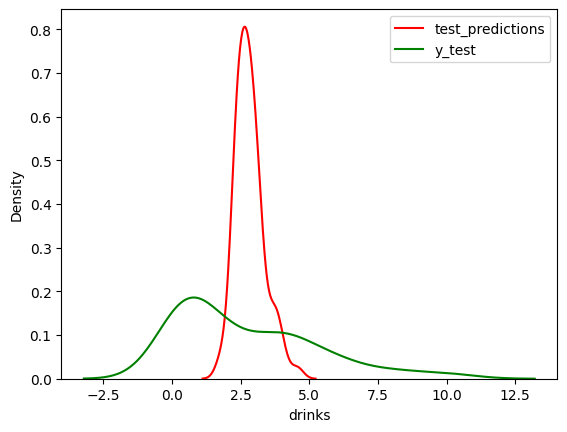

In [57]:
KdePlot(test_predictions, y_test)

In [58]:
test_predictions

array([4.56597693, 3.07368937, 2.35358697, 3.08749779, 2.70323761,
       2.34710202, 2.56418682, 2.5803729 , 2.98871875, 3.75514025,
       3.57579472, 2.73428734, 2.23033084, 2.47115281, 2.6832046 ,
       3.40268791, 2.76743557, 2.33089909, 3.09546108, 2.48520718,
       1.77938323, 2.59294131, 3.2507508 , 2.28750365, 2.89155689,
       3.16323256, 2.36906776, 3.83686794, 3.33744204, 3.11603169,
       2.94949738, 2.81916259, 2.72975146, 2.9229479 , 3.92374205,
       2.46794095, 2.89202231, 2.37732974, 3.11894949, 2.80812522,
       2.22842786, 2.23234986, 2.61900435, 2.68059498, 2.93974842,
       1.86838659, 2.44228766, 2.24409467, 2.41845262, 3.75800131,
       2.49162621, 3.40616121, 2.21285969, 3.74227186, 2.86538911,
       2.98141728, 2.73002621, 3.03912914, 2.74286226, 3.02825355,
       2.31792646, 3.1354545 , 2.69848837, 2.47601166, 2.72336316,
       4.09091082, 3.15113911, 2.61547551, 2.66112642, 2.29886689,
       2.45996156, 2.70335504])

### Wnioski 
Patrząc na wszystkie powyższe modele, można stwierdzić, że dane nie nadają się do predykcji metodą regresji liniowej jak i Aproksymacji wielomianowej. Niezależnie od ilości zmiennych oraz wartości wielomianu dane do przewidywania nie pokrywają się z aktualnymi. Mimo wszystko wskazując najlepszy model jest nim model4, jednak jest on wciąż bardzo kiepski. Nawet model regularyzacji nie był w stanie poradzić sobie z uregulowaniem wartości.

---------------------------------------------------------------------------------------------------

## Inne modele regresji

### 6. Regresja drzewa decyzyjnego

Regresja drzewa decyzyjnego to metoda uczenia maszynowego używana do prognozowania numerycznych wartości wyjściowych. Model ten buduje drzewo decyzyjne, które jest strukturą hierarchiczną składającą się z węzłów decyzyjnych i liści. W każdym węźle podejmowana jest decyzja na podstawie jednej z cech, dzieląc dane na podgrupy. Na liściach drzewa znajdują się prognozowane wartości numeryczne. Proces podziału danych i konstrukcji drzewa jest powtarzany, aż osiągnie się zadaną głębokość drzewa lub inny kryterium stopu.







In [59]:
X_train, X_test, y_train, y_test = SplitData(X, y, 0.25, 36)

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [61]:
ModelDrzewa = DecisionTreeRegressor()

In [62]:
ModelDrzewa.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
test_pred_drzewo = ModelDrzewa.predict(X_test)

In [64]:
Metrics(y_test, test_pred_drzewo)

mean_absolute_error: 2.486111111111111
mean_squared_error; 11.36111111111111
root_mean_squared_error: 3.370624736026114


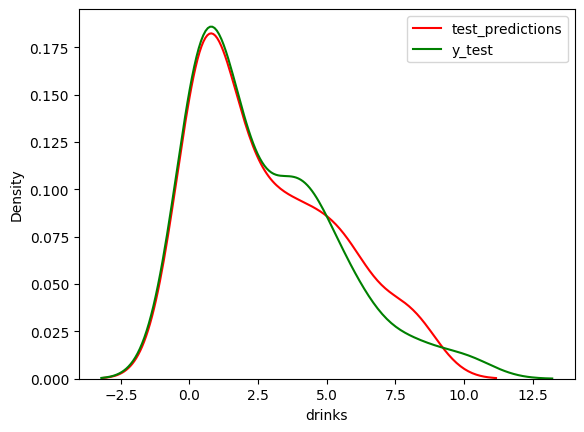

In [65]:
KdePlot(test_pred_drzewo, y_test)

Dane które testowane będą by przetestować działanie modelu

In [66]:
dane_do_predykcji = [[88, 73, 31, 28, 53],
                    [100, 130, 150, 80, 290],
                    [70, 25, 10, 15, 12]]

In [67]:
ModelDrzewa.predict(dane_do_predykcji)

array([8., 8., 8.])

### 7. Regresja lasów losowych

Regresja lasów losowych to technika uczenia maszynowego, będąca rozszerzeniem drzewa decyzyjnego. W tym przypadku, zamiast korzystać z pojedynczego drzewa, używane jest wiele drzew decyzyjnych (las), a wynik regresji jest średnią lub medianą prognoz generowanych przez poszczególne drzewa.

Parametr `n_estimators` określa liczbę drzew w lesie. Wyższa wartość tego parametru zazwyczaj prowadzi do lepszej generalizacji modelu, ale jednocześnie zwiększa złożoność obliczeniową.

Parametr `max_features` kontroluje maksymalną liczbę cech branych pod uwagę podczas rozważania podziału w węźle drzewa. Wartość tego parametru może być określona jako liczba cech lub jako stosunek do całkowitej liczby cech. Odpowiednie dostosowanie tego parametru może wpłynąć na różnorodność drzew w lesie, co może prowadzić do lepszego modelu.

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [69]:
ModelLasu = RandomForestRegressor()

Ustalenie parametów za pomocą "grid search" które model będzie próbował użyć i znaleźć najlepsze by uzyskać najlepszy wynik

In [70]:
param_grid_las = {"n_estimators":[50, 72, 100, 128, 150], "max_features":[2,3,4,5]}

In [71]:
grid_las = GridSearchCV(ModelLasu, param_grid_las)

In [72]:
grid_las.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4, 5],
                         'n_estimators': [50, 72, 100, 128, 150]})

Najlepsze parametry jakie udało się znaleźć by osiągnać jak najlepszy wynik modelu

In [73]:
grid_las.best_params_

{'max_features': 2, 'n_estimators': 72}

In [74]:
test_pred_lasy = grid_las.predict(X_test)

In [75]:
Metrics(y_test, test_pred_lasy)

mean_absolute_error: 2.084297839506173
mean_squared_error; 6.609086987740055
root_mean_squared_error: 2.57081445999902


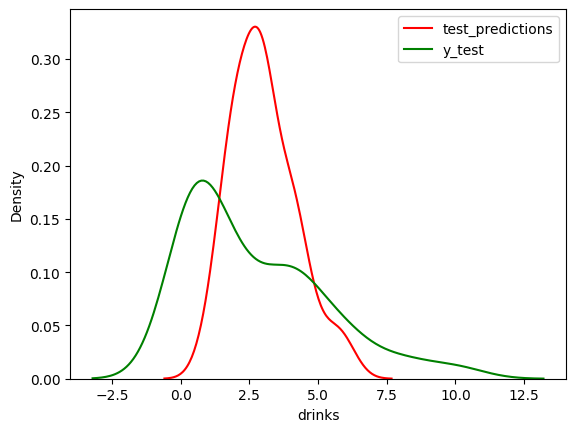

In [76]:
KdePlot(test_pred_lasy, y_test)

In [77]:
grid_las.predict(dane_do_predykcji)

array([6.24305556, 6.24305556, 6.24305556])

### 8.SVM Regressor

Maszyna Wektorów Nośnych (SVM, od ang. Support Vector Machine). Głównym celem SVM jest znalezienie hiperpłaszczyzny (w przypadku problemów klasyfikacyjnych) lub funkcji (w przypadku regresji), która efektywnie dzieli lub przybliża dane na podstawie ich cech. Podstawową ideą SVM jest maksymalizacja marginesu, czyli odległości między hiperpłaszczyzną (lub funkcją) a najbliższymi punktami danych, zwanych wektorami nośnymi. Margines ten ma na celu zwiększenie ogólnej zdolności generalizacyjnej modelu, co oznacza, że model będzie lepiej radzić sobie z nowymi, nieznajomymi danymi.

In [78]:
from sklearn.svm import SVR

In [79]:
Modelsvr = SVR()

Ustalenie parametów za pomocą "grid search" które model będzie próbował użyć i znaleźć najlepsze by uzyskać najlepszy wynik

Parametr `C` Kontroluje kompromis między dopasowaniem modelu do danych treningowych a minimalizacją wartości wag. Wartość C jest współczynnikiem kary za błędy dopasowania. Wysoka wartość C oznacza mniejszą tolerancję dla błędów na zbiorze treningowym, co może prowadzić do bardziej dopasowanego modelu.

Parametr `kernel` Określa rodzaj jądra używanego w funkcji decyzyjnej SVM. W kontekście regresji, popularne jądra to "linear" (liniowe) i "rbf" (radialne). Jądro "linear" stosuje się, gdy relacja między cechami a docelową wartością jest liniowa, a jądro "rbf" jest używane, gdy relacja jest bardziej skomplikowana i nieliniowa.

Parametr `gamma` Wpływa na zakres wpływu pojedynczego przykładu danych. 

Parametr `epsilon` Określa zakres, w jakim dopuszczalne są różnice między prognozowaną a rzeczywistą wartością dla danej próbki, aby była traktowana jako poprawna. Jest to parametr związany z tzw. insensywnością epsilon, który pozwala na pewne błędy akceptowane podczas prognozowania.

In [80]:
param_grid_svr = {"C":[0.001, 0.01, 0.1, 0.5, 1, 2, 5], "kernel":["linear", "rbf"],
              "gamma":["scale", "auto"], "epsilon":[0.001, 0.01, 0.1, 0.5, 1, 2, 5]}

In [81]:
grid_svr = GridSearchCV(Modelsvr, param_grid_svr)

In [82]:
grid_svr.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.001, 0.01, 0.1, 0.5, 1, 2, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

Najlepsze parametry jakie udało się znaleźć by osiągnać jak najlepszy wynik modelu

In [83]:
grid_svr.best_params_

{'C': 1, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [84]:
test_pred_svr= grid_svr.predict(X_test)

In [85]:
Metrics(y_test, test_pred_svr)

mean_absolute_error: 2.0190173960944424
mean_squared_error; 5.971667398779674
root_mean_squared_error: 2.443699531198481


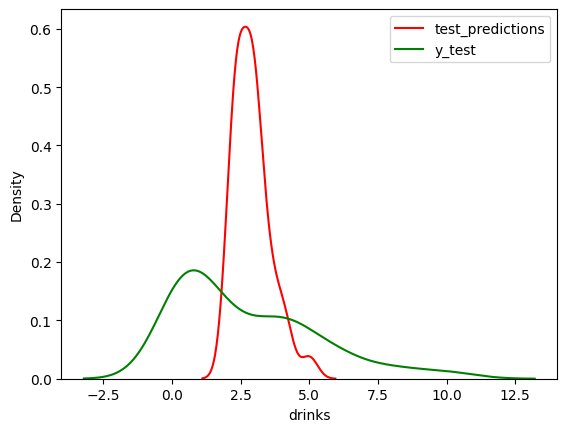

In [86]:
KdePlot(test_pred_svr, y_test)

In [87]:
grid_svr.predict(dane_do_predykcji)

array([2.98682216, 2.98682216, 2.98682216])

### 9.KNN Regressor

K-Nearest Neighbors Regressor (KNN Regressor) to algorytm uczenia maszynowego, który służy do przewidywania numerycznych wartości wyjściowych na podstawie danych treningowych. W przeciwieństwie do klasyfikacji, gdzie KNN służy do przewidywania przynależności do kategorii, w przypadku regresji, algorytm ten estymuje wartość numeryczną na podstawie k najbliższych sąsiadów.

Parametr `n_neighbors`  określa liczbę najbliższych sąsiadów branych pod uwagę przy prognozowaniu wartości dla nowego punktu danych. Jest to kluczowy parametr, który wpływa na dokładność modelu. Wybór odpowiedniej liczby sąsiadów może zależeć od charakterystyki danych i struktury problemu. Zazwyczaj, większa wartość n_neighbors oznacza bardziej wygładzoną prognozę, podczas gdy mniejsza wartość może prowadzić do bardziej zmiennych i szumnych prognoz.

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
Modelknn = KNeighborsRegressor()

In [90]:
param_grid_knn = {"n_neighbors": [1,2,3,4,5]}

In [91]:
grid_knn = GridSearchCV(Modelknn, param_grid_knn)

In [92]:
grid_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

Najlepsze parametry jakie udało się znaleźć by osiągnać jak najlepszy wynik modelu. Jest to liczba sąsiadów o wartości 5.

In [93]:
grid_knn.best_params_

{'n_neighbors': 4}

In [94]:
test_pred_knn = grid_knn.predict(X_test)

In [95]:
Metrics(y_test, test_pred_knn)

mean_absolute_error: 2.298611111111111
mean_squared_error; 8.259114583333334
root_mean_squared_error: 2.873867530581974


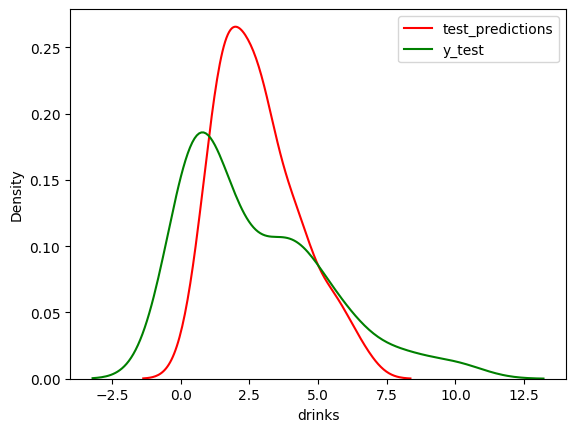

In [96]:
KdePlot(test_pred_knn, y_test)

In [97]:
grid_knn.predict(dane_do_predykcji)

array([5.5, 1. , 4.5])

-----------------------------------------------------------------------------------------------------

# Wnioski końcowe

-----------------------------

Jak można zauważyć żaden model nie poradził sobie wystarczająco by uznać, że wyniki które chcielibyśmy przewidzieć byłyby poprawne. Ta sytuacja wynikia przedewszystkim z wysoko nie zbalansowanych danych oraz niewielkiej ich ilości. Największy zbiór punktów znajduje się w warości 0.5 drinks, reszta z nich jest natomiast mocno rozprowadzona w dalszych punktach, a każdy z tych punktów posiada już znikomą ilość danych. Ciężko więc oszacować modelowi prawidłowe rozwiązanie dla innych próbek. Ten problem można by było zaradzić tzw. Future Engineering, dzięki któremu można by było lepiej zbalansować dane jednak wciąż przy tak małej ilości danych nie przyniosło by to większych korzyści. Jednym ze sposobów tego procesu było własnie usunięcie wartości odstających, które wpłyneły na wyniki jednak nie wystarczająco.

Dla niektórych wyników modeli metryka mean_absolute_error oraz root_mean_squared_error zniżyła się poniżej 2 co odrazu nie wskazuje dorbych rezultatów. W idealnym rozwiązaniu te metryki powinny być jak najniższe i zbliżać sie ku 0. By się lepiej przyjrzeć zaprezentowaliśmy wizualne zachowanie się danych testowych i testujących i mimo, że metryki dla modelu Drzewa Decyzyjnego wypadły jako najgorsze to wykres naszym osobistym zdaniem zrównywał nienajgorzej ze sobą wartości prawdziwe od przewidywanych. Jednak jeśli chodzi o przewidywanie danych z nowymi nie jest w stanie sobie poradzić i wszędzie wskazuje podobną wartość, podobnie jak las. Najbardziej odmienne wartości bazując na nowych, wcześniej nie widzianych danych jest w stanie określić model KNN jednak wciąż jest to mało prawdopodobne. Brak możliwości dopasowania sie do nowych danych oznacza też, że modele nadmiernie dopasowały się do poprzednich danych i nie są w stanie samodzielnie sprognozować na wcześniej nie widzianych propozycjach.